<a href="https://colab.research.google.com/github/FerizkiPutraAlfasa/Tubes/blob/main/Tugas11_klasifikasidaun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [7]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset")
data = []
labels = []

[INFO] loading images...


In [8]:
# loop over our input images
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [10]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [12]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.10, shuffle=True)
print(trainX.shape)
print(testX.shape)

(524, 128, 128, 3)
(59, 128, 128, 3)


In [13]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        1

In [14]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 5s 278ms/step - loss: 1.6135 - accuracy: 0.2137 - val_loss: 1.6087 - val_accuracy: 0.1525
Epoch 2/25
17/17 [==============================] - 4s 265ms/step - loss: 1.6025 - accuracy: 0.2137 - val_loss: 1.5903 - val_accuracy: 0.1525
Epoch 3/25
17/17 [==============================] - 5s 266ms/step - loss: 1.5569 - accuracy: 0.2290 - val_loss: 1.4654 - val_accuracy: 0.4237
Epoch 4/25
17/17 [==============================] - 5s 266ms/step - loss: 1.4685 - accuracy: 0.3397 - val_loss: 1.3039 - val_accuracy: 0.4746
Epoch 5/25
17/17 [==============================] - 5s 265ms/step - loss: 1.3666 - accuracy: 0.3855 - val_loss: 1.3816 - val_accuracy: 0.3390
Epoch 6/25
17/17 [==============================] - 5s 268ms/step - loss: 1.2756 - accuracy: 0.4599 - val_loss: 1.1083 - val_accuracy: 0.5424
Epoch 7/25
17/17 [==============================] - 5s 267ms/step - loss: 1.1248 - accuracy: 0.5115 - val_loss: 1.1693 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


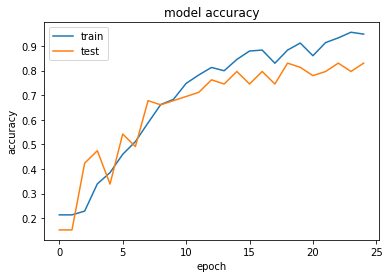

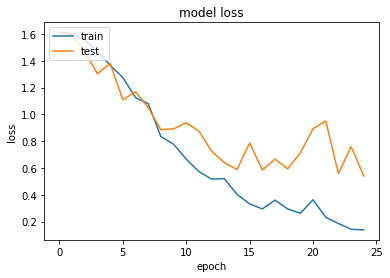

In [15]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.92      0.79      0.85        14
      GMB_02       0.69      0.90      0.78        10
      GMB_03       0.73      0.89      0.80         9
      GMB_05       0.94      0.88      0.91        17
      GMB_07       0.86      0.67      0.75         9

    accuracy                           0.83        59
   macro avg       0.83      0.82      0.82        59
weighted avg       0.85      0.83      0.83        59



In [17]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [21]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

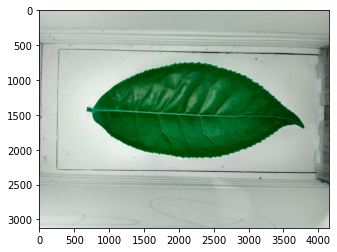

In [22]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))



In [23]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [24]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [26]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.4533363e-02 9.7496915e-01 3.0195829e-04 9.4249872e-06 1.8620364e-04]]
['GMB_02']
